In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("final_train.csv")

In [3]:
train.head(2)

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followes,shortest_path,same_commu,adar,...,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,273084,1505602,1,0,0.0,0,0.0,4,1,0,...,6.601159e-06,5.528176e-13,-9.858805e-13,-4.467632e-14,-7.483461e-13,1.108371e-12,8.869884e-07,6.781816e-14,-6.779231e-11,-9.330123e-14
1,583350,751732,1,0,0.0,0,0.0,7,1,0,...,1.830467e-14,1.824815e-14,-6.602804e-15,-1.184366e-15,-2.886807e-13,5.140467e-13,2.504026e-12,2.105196e-12,-4.668405e-14,-6.622579e-15


In [4]:
test=pd.read_csv("final_test.csv")

In [5]:
test.head(2)

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followes,shortest_path,same_commu,adar,...,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,848424,784690,1,0,0.041667,0,0.006944,2,1,0,...,5.765189e-10,1.756945e-12,-6.678875e-12,-1.409734e-13,-1.217427e-09,4.054194e-10,2.064807e-07,9.796345e-10,-1.718267e-09,-1.081557e-12
1,30825,270795,1,0,0.000000,0,0.000000,-1,1,0,...,3.267607e-11,1.130866e-11,-1.456899e-11,-6.138504e-14,-3.781343e-10,6.026381e-14,2.602858e-12,1.645293e-13,-9.548356e-14,-3.261719e-15


In [6]:
graph=nx.read_edgelist('traingraph.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
print(nx.info(graph))

Name: 
Type: DiGraph
Number of nodes: 1862220
Number of edges: 9437519
Average in degree:   5.0679
Average out degree:   5.0679


In [15]:
y_train=train["indicator_link"]
train=train.drop("indicator_link",axis=1)
train.head(1)

,source_node,destination_node,jaccard_followers,jaccard_followees,cosine_followers,cosine_followes,shortest_path,same_commu,adar,followback,...,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,pref_followers,pref_followes,svd_U_dot,svd_V_dot
0,273084,1505602,0,0.0,0,0.0,4,1,0,1,...,-7.483461e-13,1.108371e-12,8.869884e-07,6.781816e-14,-6.779231e-11,-9.330123e-14,0,112,9.026129e-12,5.855151e-12


In [16]:
y_test=test["indicator_link"]
test=test.drop("indicator_link",axis=1)
test.head(1)

,source_node,destination_node,jaccard_followers,jaccard_followees,cosine_followers,cosine_followes,shortest_path,same_commu,adar,followback,...,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,pref_followers,pref_followes,svd_U_dot,svd_V_dot
0,848424,784690,0,0.041667,0,0.006944,2,1,0,1,...,-1.217427e-09,4.054194e-10,2.064807e-07,9.796345e-10,-1.718267e-09,-1.081557e-12,0,144,7.086904e-19,1.190567e-16


In [17]:
train.drop(['source_node', 'destination_node'],axis=1,inplace=True)
test.drop(['source_node', 'destination_node'],axis=1,inplace=True)

In [18]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier

# HyperParameters Tuning

# DEPTH

In [33]:
parameters={"max_depth":[3,9,11,15]}
clf=GridSearchCV(XGBClassifier(),parameters,cv=3,scoring="roc_auc",return_train_score=True,n_jobs=-1)
clf.fit(train,y_train)

[18:02:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

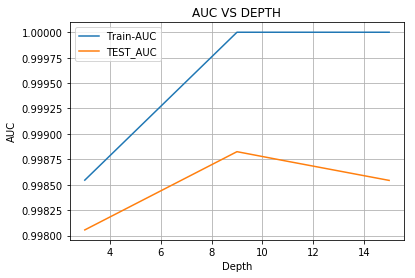

THE BEST DEPTH IS {'max_depth': 9}


In [35]:
import matplotlib.pyplot as plt
df=pd.DataFrame.from_dict(clf.cv_results_)
train_auc=df['mean_train_score']
test_auc=df['mean_test_score']
depth=[3,9,11,15]
plt.plot(depth,train_auc,label="Train-AUC")
plt.plot(depth,test_auc,label="TEST_AUC")
plt.xlabel("Depth")
plt.ylabel("AUC")
plt.title("AUC VS DEPTH")
plt.grid()
plt.legend()
plt.show()
print("THE BEST DEPTH IS",clf.best_params_)

# Estimators

In [36]:
parameters={"n_estimators": [10,50,100]}
glf=GridSearchCV(XGBClassifier(),parameters,cv=3,scoring="roc_auc",return_train_score=True,n_jobs=-1)
glf.fit(train,y_train)

[18:05:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

THE BEST estimators IS {'n_estimators': 100}


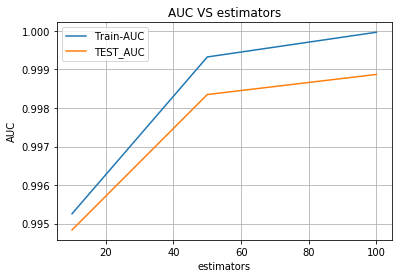

In [38]:
import matplotlib.pyplot as plt
df=pd.DataFrame.from_dict(glf.cv_results_)
train_auc=df['mean_train_score']
test_auc=df['mean_test_score']
estimators=[10,50,100]
plt.plot(estimators,train_auc,label="Train-AUC")
plt.plot(estimators,test_auc,label="TEST_AUC")
plt.xlabel("estimators")
plt.ylabel("AUC")
plt.title("AUC VS estimators")
plt.grid()
plt.legend()
plt.show
print("THE BEST estimators IS",glf.best_params_)

# Learning Rate

In [19]:
parameters={"learning_rate": [0.04, 0.09, 0.1]}
tlf=GridSearchCV(XGBClassifier(),parameters,cv=3,scoring="roc_auc",return_train_score=True,n_jobs=-1)
tlf.fit(train,y_train)

[14:07:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

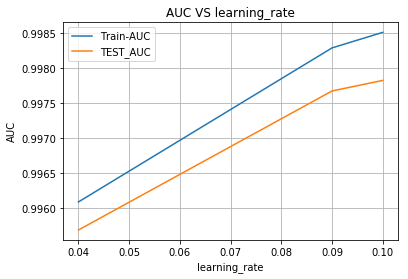

THE BEST learning_rate IS {'learning_rate': 0.1}


In [21]:
import matplotlib.pyplot as plt
df=pd.DataFrame.from_dict(tlf.cv_results_)
train_auc=df['mean_train_score']
test_auc=df['mean_test_score']
learning_rate=[0.04, 0.09, 0.1]
plt.plot(learning_rate,train_auc,label="Train-AUC")
plt.plot(learning_rate,test_auc,label="TEST_AUC")
plt.xlabel("learning_rate")
plt.ylabel("AUC")
plt.title("AUC VS learning_rate")
plt.grid()
plt.legend()
plt.show()
print("THE BEST learning_rate IS",tlf.best_params_)

In [41]:
model=XGBClassifier(max_depth=9,n_estimators=100,learning_rate=0.1)
model.fit(train,y_train)

[19:03:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
predict=model.predict(test)
predict_train=model.predict(train)

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


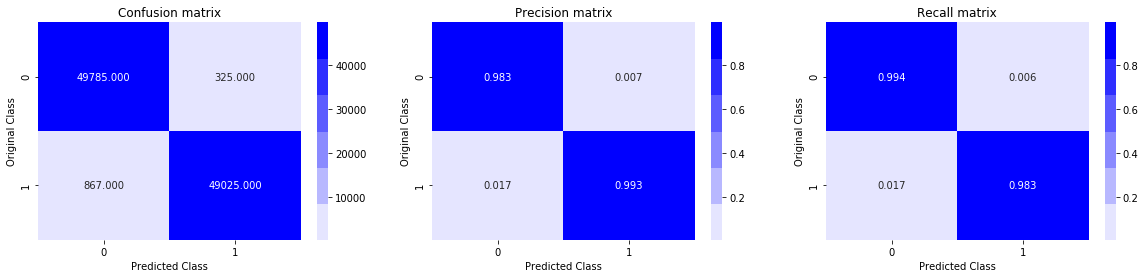

Test confusion_matrix


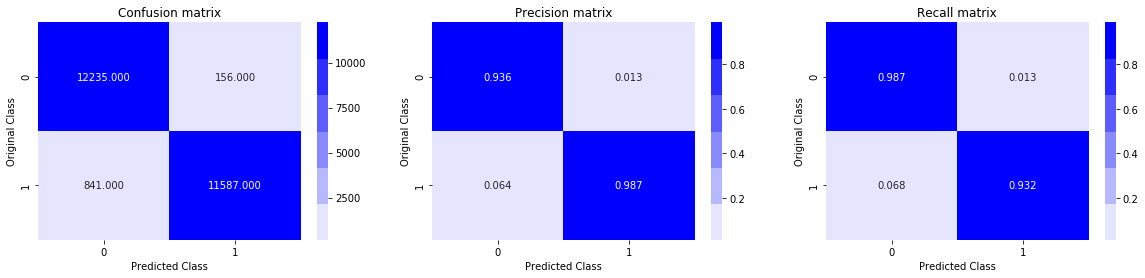

In [44]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,predict_train)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,predict)

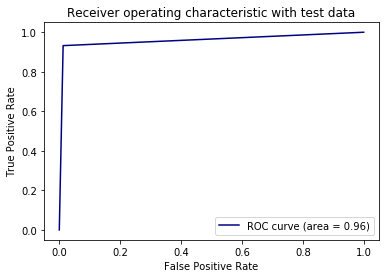

In [45]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,predict)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

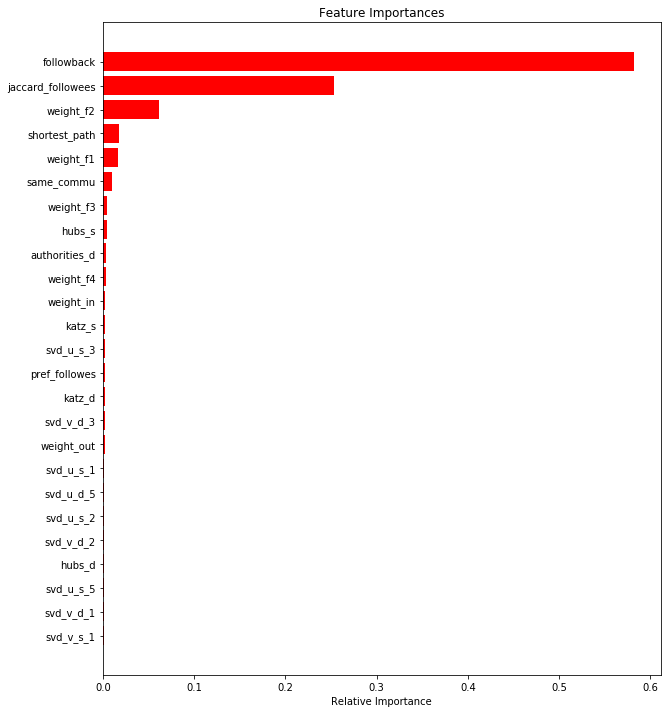

In [46]:
features = train.columns
importances = model.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Conclusion

1.XgBoost overfitting the model

2.Followback has the highest feature importance

3.precression and recall is decreasing for a class